# <center><font color=navy> Machine Learning from Theory to Practice</font></center>
## <center><font color=navy>eXplainable AI (XAI) with LIME and SHAP Methods</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
 <center> habibnia@vt.edu </center> 



<img src="images/XAI.jpg" width="700"/>


### Readings:

1. ***“Why Should I Trust You?”: Explaining the Predictions of Any Classifier,*** Marco Tulio Ribeiro, Sameer Singh, and Carlos Guestrin https://arxiv.org/abs/1602.04938.
2. ***A Unified Approach to Interpreting Model Predictions,*** Scott Lundberg, and Su-In Lee https://arxiv.org/abs/1705.07874.
3. ***The Shapley Value in Machine Learning,*** Benedek Rozemberczki, Lauren Watson, Péter Bayer, Hao-Tsung Yang, Olivér Kiss, Sebastian Nilsson, and Rik Sarkar https://arxiv.org/abs/2202.05594.


In the ever-evolving landscape of artificial intelligence and machine learning, the complexity of models has seen exponential growth. These complex models, often referred to as "black boxes," offer significant predictive power but lack transparency and interpretability. This opacity poses a challenge in critical sectors where understanding and trusting model predictions are paramount, such as healthcare, finance, and legal systems.

Imagine you've applied for a loan at a bank but received a rejection. Seeking clarity, you approach the customer service for an explanation, only to hear that an algorithm decided against your application without a clear reason. This scenario is not just frustrating but highlights a critical issue in the use of AI: the need for transparency. You, like any affected individual, deserve a comprehensible explanation for decisions that significantly impact your life. This necessity drives the push towards making machine learning models more interpretable and explainable.

Explainable AI (XAI) is an emerging field aimed at making AI systems more transparent and their decisions easier to understand by humans. It involves developing techniques that allow us to understand and trust the outputs of complex models, ensuring they can be analyzed and scrutinized for fairness, bias, and accountability. XAI seeks to open up the "black box" of AI, providing clear, understandable explanations for how and why a model has arrived at a particular decision. This is crucial in sensitive applications where the reasons behind AI decisions need to be transparent, such as diagnosing diseases, making financial decisions, or in legal judgments, ensuring that AI systems are used ethically and responsibly.

One of the most promising tools in the XAI toolkit is **SHAP (SHapley Additive exPlanations)**. SHAP leverages principles from game theory to break down the prediction of any model by quantifying the contribution of each feature. For instance, in our loan example, SHAP would analyze how factors like income, age, and credit score influence the decision. This method not only identifies the features that are most influential in a model's prediction but also illustrates how each feature impacts the overall outcome, bringing a level of transparency and understanding that was previously unattainable.

Another notable method is **LIME (Local Interpretable Model-agnostic Explanations)**, which approximates the local decision boundary of the complex model with a simpler, more interpretable model to provide insights into individual predictions.

In this notebook, we will delve into the concepts of SHAP and LIME, understand their methodologies, and apply them to real-world datasets to illustrate how they can be used to demystify the predictions of complex machine learning models, ensuring that decisions affecting individuals are fair, understandable, and accountable.

### Showcase:
To highlight the importance of Explainable AI (XAI), let's consider a simple Python example using a decision tree classifier. This classifier will be trained on a small dataset to predict whether an individual gets a loan based on two features: income and credit score. We'll then use a basic form of explanation to show which feature is more important for a particular prediction, illustrating the concept of XAI.

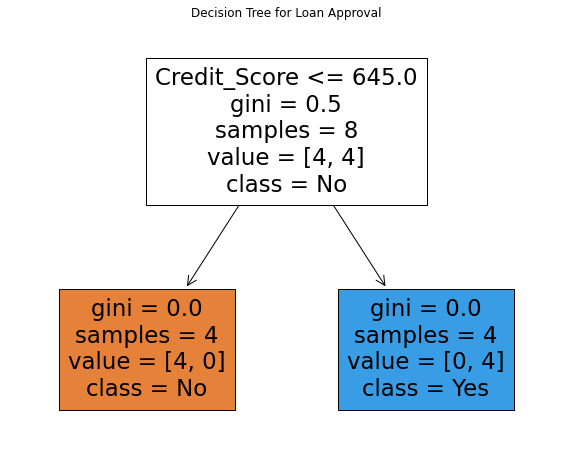

Prediction for income 50k and credit score 650: Approved
Feature importances: Income = 0.00, Credit_Score = 1.00

Explanation:
The decision is more influenced by the applicant's credit score.


In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Sample dataset
data = {
    'Income': [30, 45, 75, 50, 20, 60, 90, 25, 35, 55],
    'Credit_Score': [600, 650, 700, 610, 580, 720, 850, 590, 640, 680],
    'Loan_Approval': ['No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes']
}

df = pd.DataFrame(data)

# Features and target variable
X = df[['Income', 'Credit_Score']]
y = df['Loan_Approval']

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the decision tree classifier
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

# Plotting the decision tree
plt.figure(figsize=(10,8))
plot_tree(classifier, filled=True, feature_names=['Income', 'Credit_Score'], class_names=['No', 'Yes'])
plt.title("Decision Tree for Loan Approval")
plt.show()

# Example prediction
sample_data = {'Income': [50], 'Credit_Score': [650]}  # Sample data point with income 50k and credit score 650
sample_df = pd.DataFrame(sample_data)
prediction = classifier.predict(sample_df)
print(f"Prediction for income 50k and credit score 650: {'Approved' if prediction[0] == 'Yes' else 'Rejected'}")

# Explainability part
feature_importances = classifier.feature_importances_
print(f"Feature importances: Income = {feature_importances[0]:.2f}, Credit_Score = {feature_importances[1]:.2f}")

# Explain the decision
print("\nExplanation:")
if feature_importances[0] > feature_importances[1]:
    print("The decision is more influenced by the applicant's income.")
else:
    print("The decision is more influenced by the applicant's credit score.")


Feature importance measures the significance of each feature in the prediction process of a model. In decision trees and their ensembles, it quantifies how much each feature contributes to reducing the split criterion (like Gini impurity or entropy) across all nodes.

Gini impurity is a measure used to evaluate the purity of a node in a decision tree. It is defined as:

$$
\text{Gini impurity} = 1 - \sum_{i=1}^{n} (p_i)^2
$$

where $p_i$ is the proportion of samples belonging to class $i$ within a node, and the sum is over all $n$ classes. A node is pure (Gini impurity = 0) if all samples belong to the same class.

Feature importance is calculated based on the decrease in node impurity weighted by the probability of reaching that node (which is proportional to the number of samples that go through the node) and averaged across all trees in the ensemble. The importance of each feature is then normalized so that the sum of all importances equals 1.

The steps for calculating feature importance in a decision tree are:

- For each node that splits on a feature, calculate the reduction in impurity (e.g., decrease in Gini impurity) attributed to that feature.
- For each feature, sum the reductions in impurity across all nodes in the tree where that feature was used to split.
- Normalize the feature importances by dividing each feature's importance by the sum of all features' importances.

Feature importance provides valuable insights into the predictive power of each feature in a model, highlighting which features most strongly influence the model's predictions. This not only aids in model interpretation but also guides feature selection and model refinement processes.


## SHAP (SHapley Additive exPlanations)


SHAP (SHapley Additive exPlanations) is a method from interpretability in machine learning that explains the output of any model by computing the contribution of each feature to the prediction. SHAP connects game theory with local explanations, using the classical Shapley values from cooperative game theory to attribute the change in the expected model prediction to each feature value.

The concept of SHAP is grounded in the Shapley value, a solution concept from cooperative game theory introduced by Lloyd Shapley in 1953. The original paper by Shapley, "A Value for n-person Games," (See: https://www.rand.org/content/dam/rand/pubs/papers/2021/P295.pdf) introduced a method to fairly distribute the payoff among players in a coalition game, based on their individual contributions to the total payoff.

The adaptation of Shapley values to machine learning model explanation was introduced by Lundberg and Lee in their seminal paper "A Unified Approach to Interpreting Model Predictions" (2017). They proposed SHAP values as a unified measure of feature importance that satisfies desirable properties such as consistency and local accuracy.

#### Main Idea and Intuition

The main idea behind SHAP is to consider the prediction of a model as a game where each feature value of the instance is a "player" and the prediction is the "payout". SHAP values tell us how to fairly distribute the "payout" among the features, with each feature's contribution being the SHAP value.

Intuitively, SHAP looks at the difference a feature value makes by comparing what a model predicts with and without the feature. However, since features are often correlated, SHAP considers all possible combinations of features to determine the average marginal contribution of each feature across all possible combinations.

SHAP values are additive, which means that the contribution of each feature to the final prediction can be computed independently and then summed up. This property allows for efficient computation of SHAP values, even for high-dimensional datasets.

SHAP is model-agnostic, meaning it can be used to explain predictions from various types of models, including tree-based models (e.g., decision trees, random forests), linear models, and even deep neural networks. This makes it a versatile tool for explaining predictions across different modeling techniques.

SHAP primarily provides local explanations. It focuses on explaining individual predictions rather than offering a global understanding of how the entire model works. By analyzing the contribution of each feature to a specific prediction, SHAP allows you to understand why a specific instance received that particular outcome. SHAP values add up to the difference between the expected model output and the actual output for a given input. This means that SHAP values provide an accurate and local interpretation of the model's prediction for a given input.


#### Mathematics and Computation

The SHAP value for a feature $j$ is calculated as follows:

$$
\phi_j = \sum_{S \subseteq F \setminus \{j\}} \frac{|S|! (|F| - |S| - 1)!}{|F|!} [f(S \cup \{j\}) - f(S)]
$$

where:
- $F$ is the set of all features.
- $S$ is a subset of features excluding $j$.
- $f(S)$ is the model prediction for feature set $S$.
- $|S|$ is the number of features in set $S$.
- $|F|$ is the total number of features.

This formula computes the average marginal contribution of feature $j$ across all possible combinations of features.

- $|S|!$ is the factorial of the number of features in subset $S$.
- $(|F| - |S| - 1)!$ is the factorial of the number of features not in subset $S$, excluding the feature $j$.
- $|F|!$ is the factorial of the total number of features in the set $F$.

These factorials are used to calculate the weights for the average marginal contribution of feature $j$ across all possible combinations of features, ensuring that each subset size $S$ is appropriately considered in the computation of the SHAP value.

#### Pseudo Algorithm

1. For each feature $j$ in the model:
   - Initialize $\phi_j = 0$.
2. For each subset $S$ of features excluding $j$:
   - Compute the marginal contribution of $j$ when added to $S$: $f(S \cup \{j\}) - f(S)$.
   - Update $\phi_j$ by adding the weighted marginal contribution.
3. Return the SHAP values $\phi$ for each feature.


#### Fundamental Properties of SHAP Values

SHAP values offer unique advantages thanks to their adherence to four key properties: **Efficiency, Symmetry, Null Player, Linearity, and Additivity**. These properties, collectively, ensure a **fair and interpretable** distribution of contribution among features in a model's prediction.

**1. Efficiency:**

The sum of all SHAP values for all features equals the difference between the prediction for a specific instance and the average prediction over the entire dataset. This ensures that all contributing factors are accounted for in the final prediction.

**2. Symmetry:**

Features with identical contributions to all possible combinations of features (coalitions) receive the same SHAP value. This guarantees fairness in attributing importance when features have equal influence.

**3. Null Player:**

A feature that has no impact on the prediction, regardless of the other features it is combined with, receives a SHAP value of zero. This effectively removes irrelevant features from the explanation.

**4. Additivity:**

The contribution of each feature to the final prediction can be calculated independently and then summed up with the contributions of other features. This allows for efficient computation of SHAP values, especially for complex models with many features.

**5. Linearity:**

If two models described by the prediction functions $f$ and $g$ are combined, the distributed prediction should correspond to the contributions derived from $f$ and the contributions derived from $g$. In particular, the “linearity” property is useful when we have ensemble models (e.g. random forest), where in order to compute the Shapley Value for a feature, we have just to average the single contributions of each tree.


#### Example: Loan Approval

Consider a loan approval model predicting whether a loan should be approved based on features like income and credit score. Using SHAP, we can explain an individual prediction by calculating the SHAP values for each feature.

- Suppose the model predicts a certain loan application should be approved.
- SHAP can reveal that the applicant's high income contributed positively to the model's decision, while a mediocre credit score had a negative impact.
- The SHAP values quantify the exact contribution of each feature to the decision, providing clear and actionable insights into the model's behavior.



### Implementing SHAP in Python

For more details on SHAP, visit the [SHAP GitHub repository](https://github.com/slundberg/shap).

The SHAP library offers an innovative approach to explain the output of machine learning models through Shapley values, a concept from cooperative game theory. It provides a granular view of feature influence, enhancing interpretability. This example utilizes SHAP with the South German Credit Data, which comprises `credit_risk` data, to dissect the impact of various features on the model's decisions, thereby promoting transparency in predictive modeling.


Dataset Overview

- **Period**: Data from 1973 to 1975.
- **Sample Size**: 1000 instances.
- **Features**: 20 predictor variables and 1 target variable (credit_risk).
- **Target Variable**: `credit_risk` indicating good or bad credit.
- **Instance Characteristics**: 700 good and 300 bad credits.
- **Sampling Method**: Stratified, with bad credits heavily oversampled.
- **Associated Tasks**: Classification, potentially regression and clustering.
- **Feature Types**: Integer, real.
- **Missing Values**: None reported.


Variable Information

A brief overview of some key variables:

- `status`: Status of the debtor's checking account with the bank.
- `duration`: Credit duration in months.
- `credit_history`: History of compliance with previous or concurrent credit contracts.
- `purpose`: Purpose for which the credit is needed.
- `amount`: Credit amount in DM.
- `savings`: Debtor's savings.
- `employment_duration`: Duration of debtor's employment with current employer.
- `installment_rate`: Credit installments as a percentage of debtor's disposable income.
- `personal_status_sex`: Combined information on sex and marital status.
- `age`: Age in years.
- `credit_risk`: Whether the credit contract was complied with (good) or not (bad).

In [ ]:
!pip install shap>null
!pip install sage-importance>null

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
import sage.datasets

In [44]:
# Load data
df = sage.datasets.credit()
df.head()

,Checking Status,Duration,Credit History,Purpose,Credit Amount,Savings Account/Bonds,Employment Since,Installment Rate,Personal Status,Debtors/Guarantors,...,Property Type,Age,Other Installment Plans,Housing Ownership,Number Existing Credits,Job,Number Liable,Telephone,Foreign Worker,Good Customer
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [46]:
# Identify the target variable as the last column
target_variable = df.columns[-1]

# Prepare features and target
X = df.drop(columns=target_variable)
y = df[target_variable]

# Split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize SHAP Explainer on the trained RandomForest model
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

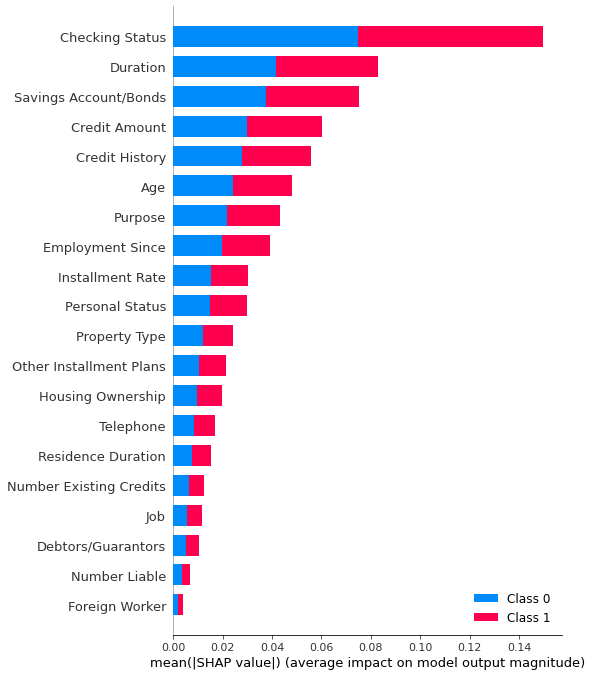

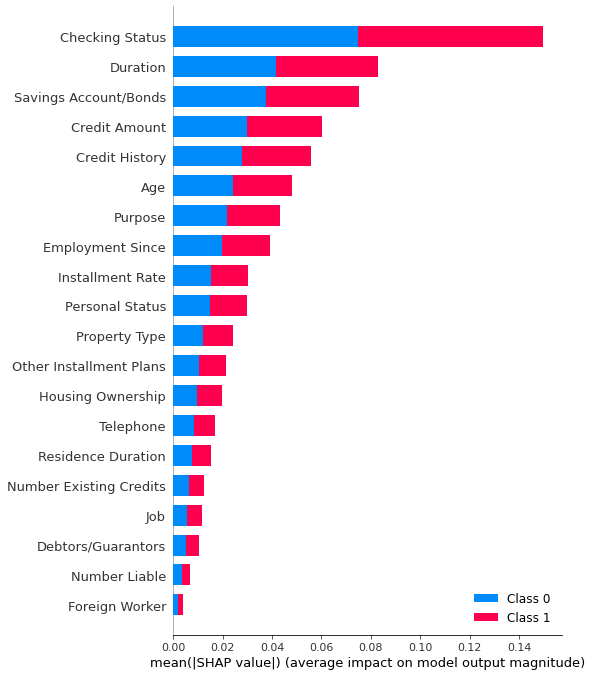

In [47]:
# SHAP Summary Plot for global feature importance
# The summary plot shows which features are most important across all predictions.
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


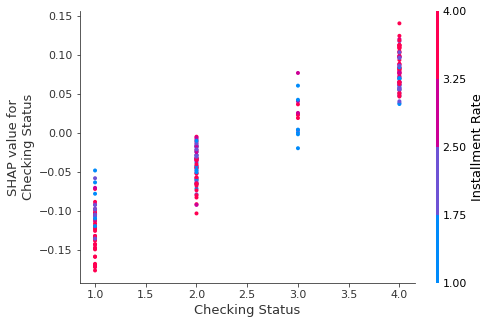

In [48]:
# SHAP Dependence Plot for a specific feature
'''
Dependence plots can help understand how a single feature's value influences the prediction,
potentially uncovering interactions between features.
'''
feature_to_visualize = X.columns[0]  # Example: visualizing the first feature
shap.dependence_plot(feature_to_visualize, shap_values[1], X_test, feature_names=X.columns)

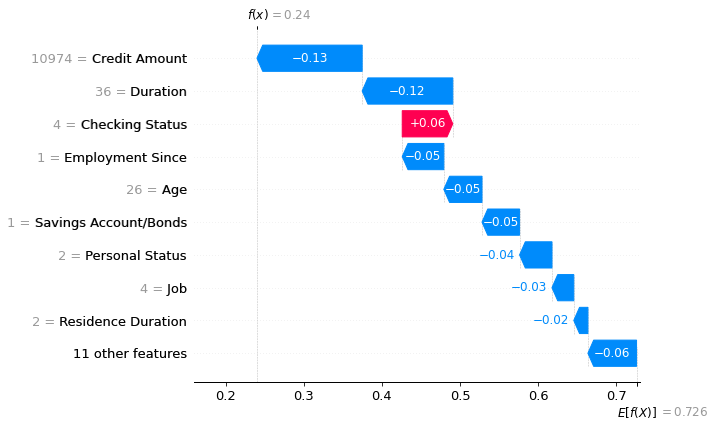

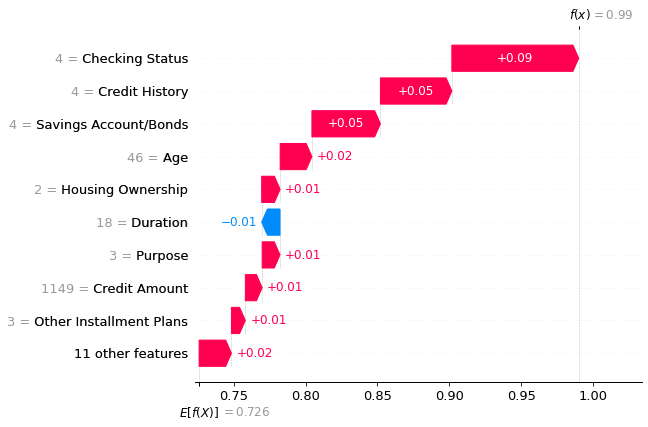

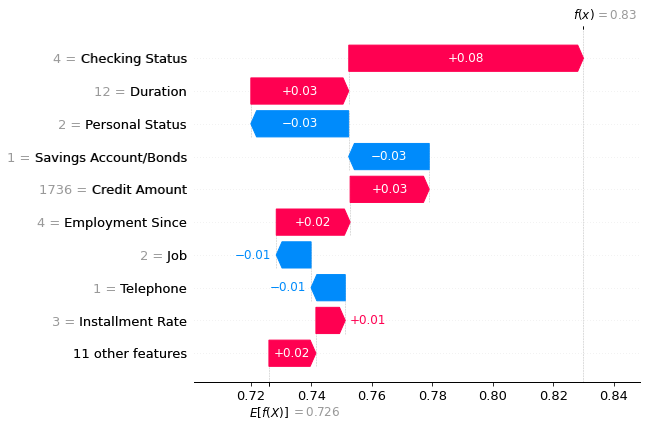

In [51]:
# SHAP Waterfall Plot for individual predictions
'''
Waterfall plots detail the contribution of each feature to specific predictions, 
elucidating the model's decision-making process.
'''
for i in range(min(len(X_test), 3)):  # Adjust the range as needed
    # Display the waterfall plot for the i-th prediction in X_test
    shap.waterfall_plot(shap.Explanation(values=shap_values[1][i],
                                         base_values=explainer.expected_value[1],
                                         data=X_test.iloc[i],
                                         feature_names=X_test.columns.tolist()))



## LIME (Local Interpretable Model-agnostic Explanations)

LIME is an influential technique in the field of machine learning interpretability, introduced by Ribeiro, Singh, and Guestrin in their 2016 paper titled "Why Should I Trust You?": Explaining the Predictions of Any Classifier. This method aims to demystify the predictions of any model by locally approximating it with an interpretable model, such as linear regression or decision trees. Unlike global explanation methods that seek to understand the model's overall logic, LIME focuses on clarifying individual predictions.

The methodology behind LIME creates a simple model that mimics the complex model's decisions within a small vicinity around the instance being explained. This approximation is achieved by altering the input data to generate new samples around the target instance and then using the original complex model to predict the outcomes for these samples. The interpretable model is subsequently trained on this newly generated dataset, with sample weights determined by their closeness to the target instance.

#### Main Idea and Intuition

The premise of LIME is predicated on the notion that while complex models may be challenging to interpret globally, they can be approximated locally with simpler, understandable models. By zeroing in on a narrow region surrounding an instance's prediction, LIME constructs an interpretable model that sheds light on the rationale behind the complex model's specific decision.

The approach involves two key steps:
1. **Perturbation of Input Data:** This entails generating new samples in the vicinity of the instance being explained through minor modifications to the input data.
2. **Training an Interpretable Model:** These samples are used to train a straightforward model that faithfully represents the complex model's behavior in the local context.

The significance of each feature in the prediction of the specific instance is revealed through the weights of the interpretable model, thus offering local interpretability.

#### Mathematics and Computation

The underlying formulation of LIME can be represented as follows, focusing on the creation of an interpretable model that minimizes the loss of fidelity to the original model while ensuring simplicity:

$$\text{minimize}_{g \in G} \ \mathcal{L}(f, g, \pi_x) + \Omega(g)$$

Here:
- $f$ represents the complex model.
- $g$ denotes the interpretable model from a class of models $G$.
- $\mathcal{L}$ is a measure of fidelity, quantifying how well $g$ approximates $f$ in the vicinity of the instance $x$, weighted by $\pi_x$, a proximity measure.
- $\Omega(g)$ is a complexity measure of the interpretable model, encouraging simplicity.

The mathematical foundation of LIME is encapsulated in the following process:
1. **Instance Selection:** Choose an instance for which the prediction needs explanation.
2. **Data Perturbation:** Generate a synthetic dataset by perturbing the input data around the chosen instance.
3. **Outcome Prediction:** Utilize the original, complex model to predict the outcomes for these synthetic instances.
4. **Weight Assignment:** Assign weights to the synthetic instances based on their proximity to the original instance.
5. **Interpretable Model Training:** Train an interpretable model on this weighted dataset.
6. **Feature Contribution Analysis:** The model's coefficients indicate each feature's contribution to the instance's prediction.

#### Pseudo Algorithm

1. **Initialization:** For the target instance requiring explanation, create perturbed samples in its vicinity.
2. **Prediction by Original Model:** Use the complex model to predict outcomes for these perturbed samples.
3. **Proximity Calculation:** Determine each perturbed sample's closeness to the original instance and assign weights.
4. **Interpretable Model Training:** Train a simple model, like linear regression, on the perturbed dataset, incorporating the proximity-based weights.
5. **Explanation Generation:** The interpretable model's coefficients are analyzed to explain the prediction of the original instance, highlighting the influence of individual features.




### Advantages and Limitations of LIME

**Advantages:**

- **Model Agnosticism:** LIME transcends the boundaries of specific model types, offering the flexibility to explain predictions made by **a wide range of machine learning models**, regardless of their underlying complexities. This versatility broadens its application potential in various domains.
- **Focus on Local Interpretability:** LIME delves deeper by providing **interpretable explanations** for individual predictions. Instead of solely revealing a model's general behavior, it helps us understand the **specific factors that contribute most** to the outcome for any given instance. This granular level of detail is invaluable, particularly when dealing with intricate models whose inner workings might otherwise remain shrouded in mystery.
- **Explanations Tailored to Non-Experts:** Unlike some interpretability methods that rely on complex mathematical concepts, LIME generates explanations that are **more readily understandable for users who lack extensive knowledge of machine learning**. This characteristic makes it a powerful tool for stakeholders who need to understand model behavior without diving into the technical intricacies.
- **Adaptability to Diverse Data Types:** LIME exhibits adaptability by demonstrating **effectiveness in explaining insights gleaned from different data types**, encompassing **tabular data, text, and images**. This versatility allows it to address a wider array of tasks and analysis requirements, further enhancing its practical value.
- **User-Friendliness:** LIME offers user-friendly **Python** and **R libraries** (**lime** and **iml** packages), making it readily accessible to individuals with diverse programming backgrounds. This ease of use lowers the barrier to entry and facilitates the adoption of interpretability techniques in various settings.

**Limitations:**

- **Local Scope:** While LIME sheds light on the factors influencing individual predictions, it is crucial to acknowledge its **focus on local behavior**. This means that it might not necessarily provide a comprehensive understanding of the model's overall decision-making processes. To gain a more holistic perspective, it's often beneficial to complement LIME's insights with other interpretability techniques that offer a wider lens for analyzing the model's global behavior.
- **Perturbation Dependency:** The **effectiveness of LIME's explanations** is inherently **dependent on the quality and effectiveness of the chosen kernel function**. This function dictates how the explainer perturbs input data to generate explanations. Inappropriate selection of the kernel function can result in misleading or unreliable explanations. It's therefore essential to carefully consider the properties of the data and the specific interpretability goals when choosing the kernel.
- **Complexity in Certain Contexts:** While LIME strives to be user-friendly, the underlying conceptual foundation and practical implementation can present **challenges for users who lack a basic understanding of machine learning**. To truly harness the full potential of LIME, a foundational grasp of relevant concepts in machine learning and interpretability is highly beneficial.
- **Potential for Misleading Samples:** LIME's reliance on random sampling techniques (such as uniform and Gaussian distributions) to create new data points carries a potential **risk of generating unrealistic or misleading samples**, particularly if the chosen kernel function is not optimal or if the data distribution exhibits complex features and relationships. Careful consideration of the chosen kernel and sampling approach is crucial to mitigate this risk.

### Implementing LIME in Python

This example showcases how to employ LIME with the Lending Club dataset, which encompasses loan information. We'll focus on explaining why the model predicted a particular outcome for a specific loan applicant, considering factors like loan amount and interest rates. This exercise fosters transparency within the realm of predictive modeling.

For more details on LIME, visit the [LIME GitHub repository](https://github.com/marcotcr/lime).

In [ ]:
!pip install lime>null

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular
import sage.datasets

# Load data
df = sage.datasets.credit()

# Preparing the dataset
X = df.drop(columns=df.columns[-1])
y = df[df.columns[-1]].astype(int)
feature_names = X.columns.tolist()

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize LIME Explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names,
    class_names=['Bad Credit', 'Good Credit'], 
    mode='classification'
)


def predict_proba(X):
    if isinstance(X, pd.Series):
        # Convert Series to DataFrame
        X = X.to_frame().T
    elif isinstance(X, np.ndarray):
        # Ensure 2D array for sklearn compatibility
        X = X if X.ndim == 2 else X.reshape(1, -1)
    return model.predict_proba(X)

# Explain an individual prediction from the test set, addressing Series warning
idx = 1  # Index of the instance to explain
exp = explainer.explain_instance(
    data_row=X_test.iloc[idx].values,  # Use .values to pass numpy array
    predict_fn=predict_proba,  # Use the modified predict function
    num_features=len(feature_names)
)

# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=False)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
